In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap

In [2]:
import seaborn as sns
sns.set()

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import numpy as np

In [4]:
from sklearn.datasets import make_blobs

In [20]:
X, y = make_blobs(n_samples= 50, centers=2, random_state= 13, cluster_std=0.6)

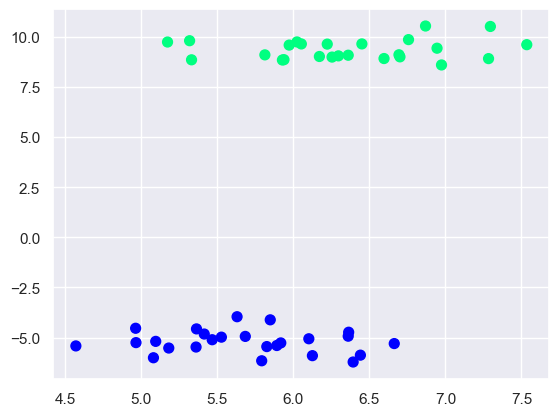

In [21]:
plt.scatter(X[:,0],X[:,1], c = y, s = 50, cmap = 'winter')

In [22]:
from sklearn.svm import SVC

In [24]:
smv_model = SVC(kernel='linear', C= 1)

In [26]:
smv_model.fit(X,y)

SVC(C=1, kernel='linear')

In [ ]:
smv_model.decision_function

In [52]:
def svc_plot(model, ax = None, plot_support = True):
                                                 
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x  = np.linspace(xlim[0],xlim[1],30)
    y  = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    
# plot decision boundry and margins
    
    ax.contour(X,Y,p, colors = 'k',
              levels = [-1,0,1], alpha = 0.5,
               linestyle  = ['--','--','--'])
    
    #plot support vactors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

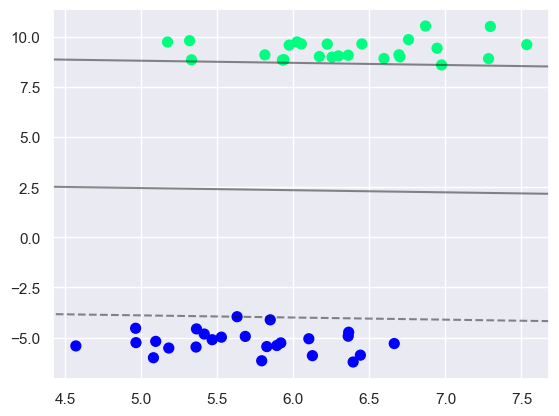

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
svc_plot(smv_model);

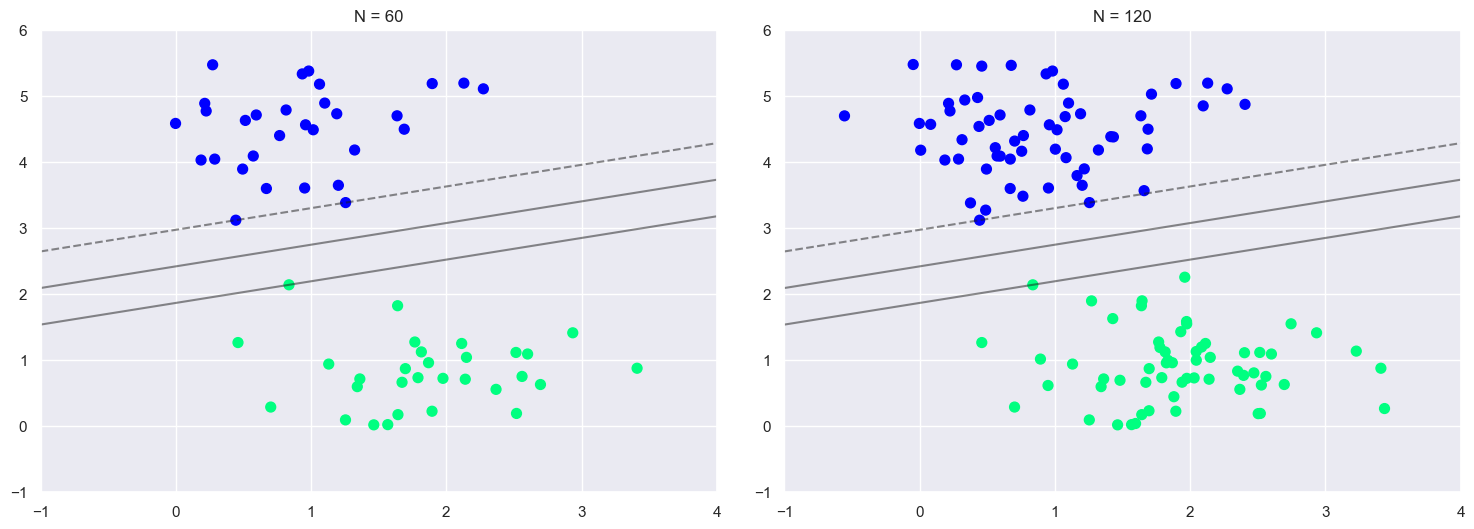

In [53]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1e10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    svc_plot(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

***Working with Almost Linearly Separable Dataset***

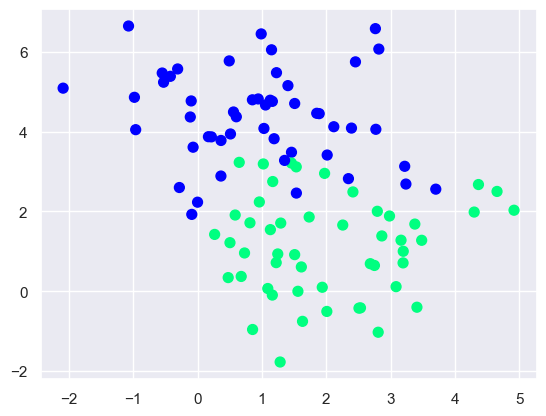

In [46]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

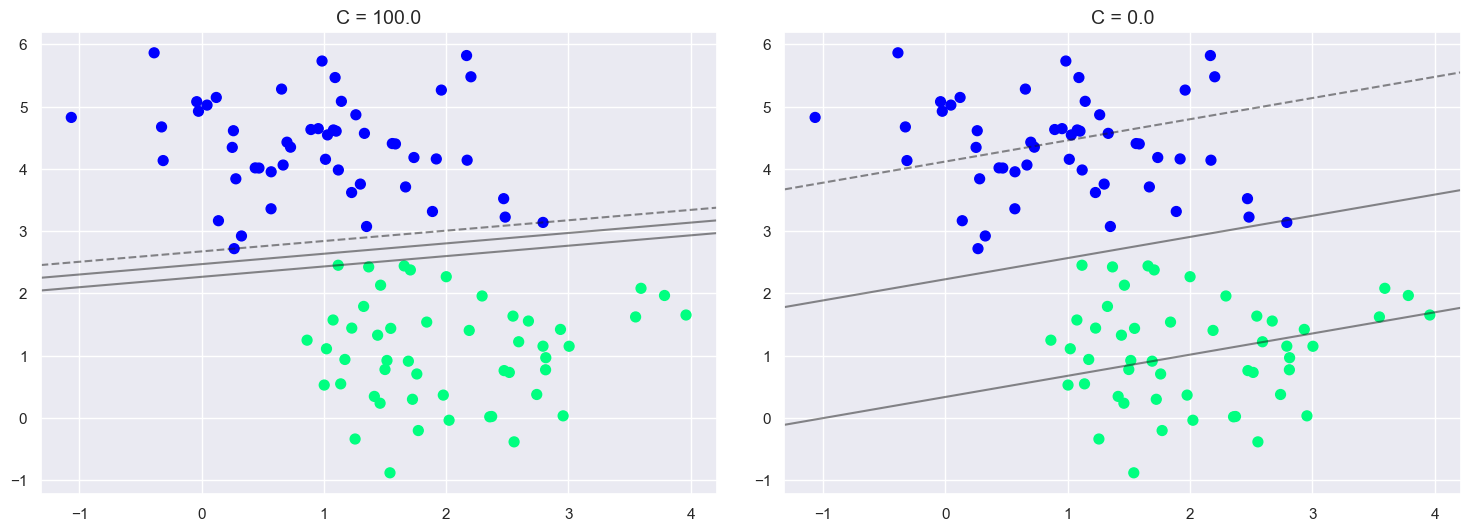

In [54]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    svc_plot(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## The Kernel-
    for transformation into higher dimensional space

In [55]:
from sklearn.datasets import make_circles

In [62]:
X,y = make_circles(n_samples= 100, factor= 0.1, noise= 0.1)

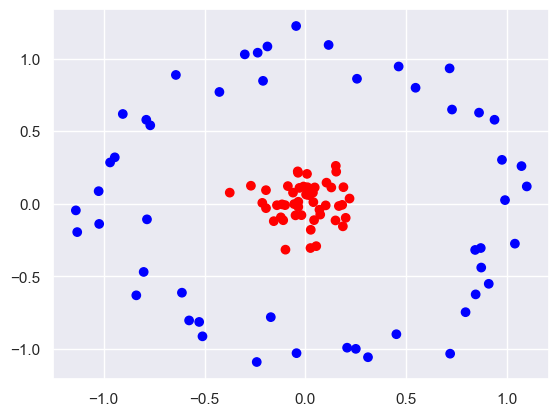

In [63]:
plt.scatter(X[:,0],X[:,1], c=y, cmap= 'bwr')

In [65]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state=13)

In [72]:
SVM = SVC(kernel= 'linear')

In [75]:
SVM.fit(x_train,y_train.ravel())

SVC(kernel='linear')

In [76]:
y_pred = SVM.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

0.6

In [83]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


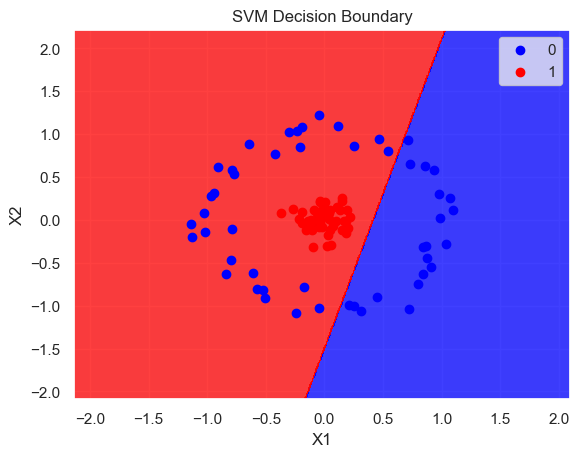

In [85]:
plot_decision_boundary(X, y, SVM)

In [86]:
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1)) #Projecting it into higher dimension
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap = 'bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

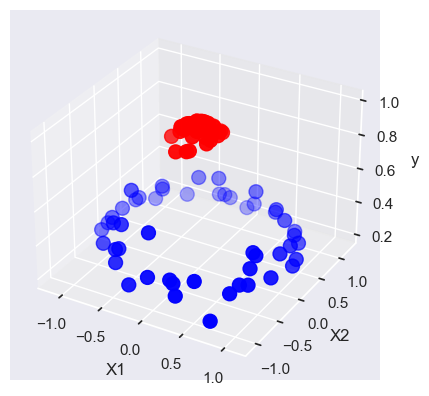

In [87]:
plot_3d_plot(X,y)

In [88]:
rbf = SVC(kernel='rbf')

In [90]:
rbf.fit(x_train,y_train)

SVC()

In [91]:
y_pred = rbf.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


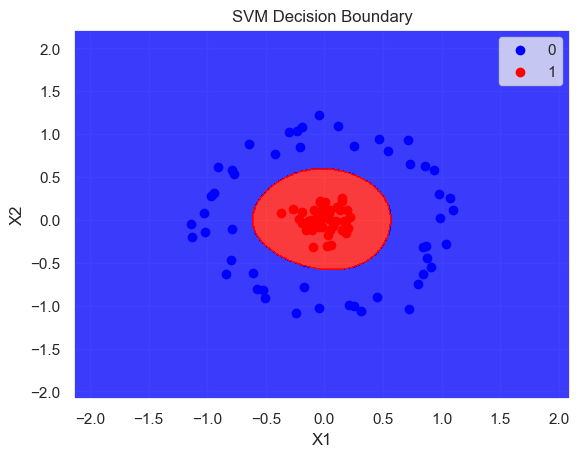

In [93]:
plot_decision_boundary(X, y, rbf)

In [94]:
poly = SVC(kernel='poly')

In [95]:
poly.fit(x_train,y_train)

SVC(kernel='poly')

In [96]:
y_pred = poly.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred)

0.6

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


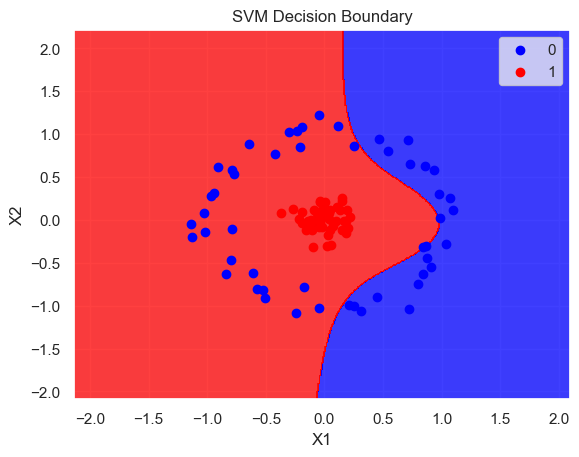

In [98]:
plot_decision_boundary(X, y, poly)

***Advantages of Support Vector Machines (SVMs):***

    Effective in high dimensional spaces: SVMs are effective even in cases where the number of features is much greater than the number of samples.

    Memory efficient: The training phase of an SVM requires only a subset of the training data, called support vectors, to be stored, which makes the algorithm memory efficient.

    Robust to overfitting: SVMs have a regularization parameter, which helps to control overfitting and improve the generalization performance of the model.

    Versatile: SVMs can be used for both classification and regression tasks, and can handle multi-class problems through the use of one-vs-one or one-vs-all approaches.

    Non-linear decision boundaries: SVMs can handle non-linear decision boundaries through the use of kernel functions.

***Disadvantages of Support Vector Machines (SVMs):***

    Computational complexity: The training phase of an SVM can be computationally intensive, especially for large datasets.

    Choice of kernel: The choice of kernel function can have a significant impact on the performance of an SVM. The correct choice of kernel requires experience and trial-and-error.

    Hyperparameter tuning: The performance of an SVM is sensitive to the choice of hyperparameters, such as the regularization parameter and the kernel parameters. This requires a significant amount of tuning to get the best results.

    Limited interpretability: SVMs are less interpretable than other machine learning algorithms, as they are based on a complex mathematical formulation.

    Lack of probabilistic interpretation: Unlike some other algorithms, such as logistic regression, SVMs do not provide a probabilistic interpretation of the class probabilities.